In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import math

## Question 1: write your own random number generator and verify it is truly uniformly sampling from 0-1 via a plot

In [2]:
''' Constants for the algorithm using linear congruence 
with sequence x(n+1) = [a * x(n) + C] mod m ''' 
a = 1566083941
C = 1
m = 2**32
print("m = %i, a = %i, C = %i"%(m,a,C))

m = 4294967296, a = 1566083941, C = 1


In [3]:
# generate N random numbers uniformly
def generate_random_numbers(x0, a, C, m, N):
    sequence  = [x0/m]
    number = x0
    for i in range(N - 1):
        number = (a * number + C) % m
        sequence.append(number/m)
    return sequence

def display_histogram(numbers, seed, N, n_bins, n_range, output_file):
    plt.figure(dpi = 100)
    plt.hist(numbers, range = n_range, bins = n_bins)
    plt.plot(n_range[0], n_range[1], [N/n_bins, N/n_bins], 'r--')
    plt.xlabel("Generated Number ")
    plt.ylabel("Count")
    plt.xlim(n_range[0], n_range[1])
    plt.title("m = %i, a = %i, C = %i, x0 = %i \n%i Generated Numbers, %i Bins"%(m, a, C, seed, N, n_bins))
    plt.savefig(output_file)
    plt.show()

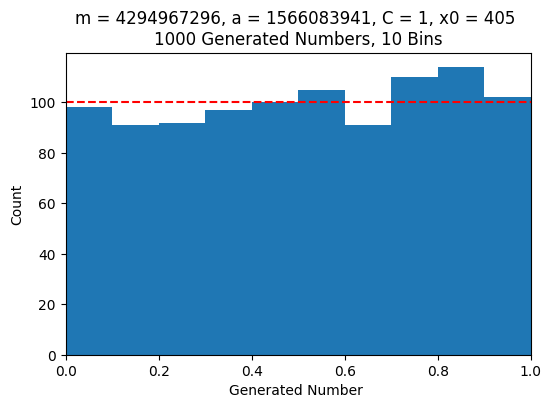

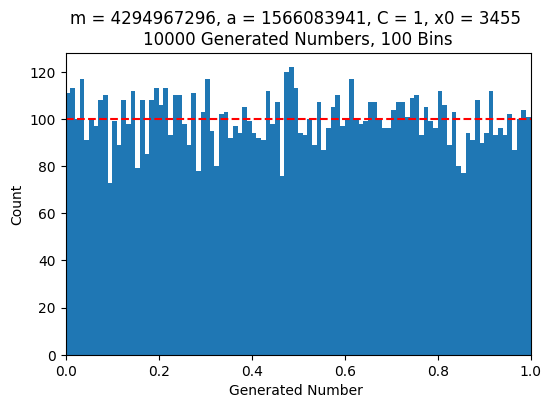

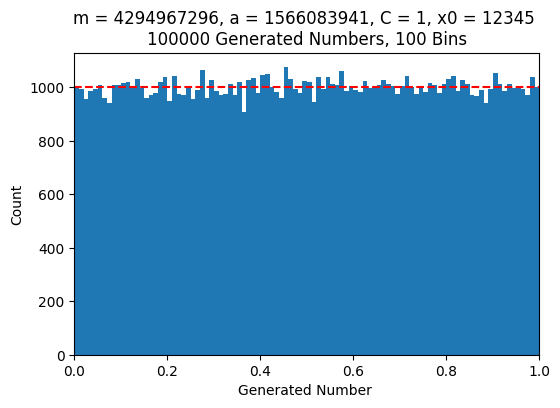

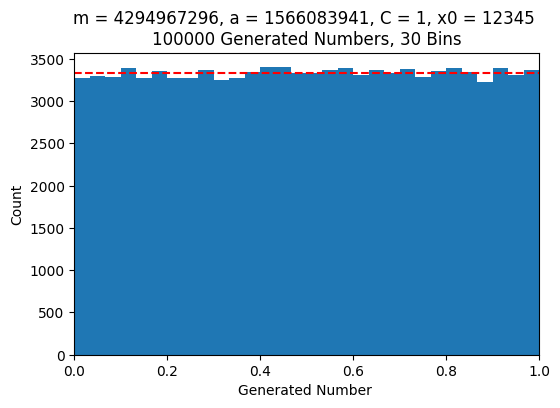

In [4]:
# test the algorithm for different initial conditions: [seed, N, n_bins, output_file]
tests = [
    [405, 1000, 10, 'test_1'],
    [3455, 10000, 100, 'test_2'],
    [12345, 100000, 100, 'test_3'],
    [12345, 100000, 30, 'test_4']
]

for test in tests:
    result = generate_random_numbers(test[0], a, C, m, test[1])
    display_histogram(result, test[0], test[1], test[2], (0,1), test[3])

## Question 2: calculate the integral of x^2  from 0 to 10 (and compare to analytic result) using:
- Riemann sums (3 versions)
- Trapezoidal rule
- Sampling rule

In [5]:
def integral_riemann_sum_left(f, x_min, x_max, N_slices):
    delta_x = (x_max - x_min)/ N_slices
    x = x_min
    f_sum = 0
    for n in range(N_slices):
        f_sum += f(x)
        x += delta_x
    return delta_x * f_sum

def integral_riemann_sum_right(f, x_min, x_max, N_slices):
    delta_x = (x_max - x_min)/ N_slices
    x = x_min + delta_x
    f_sum = 0
    for n in range(N_slices):
        f_sum += f(x)
        x += delta_x
    return delta_x * f_sum

def integral_riemann_sum_center(f, x_min, x_max, N_slices):
    delta_x = (x_max - x_min)/ N_slices
    x = x_min + (delta_x/2)
    f_sum = 0
    for n in range(N_slices):
        f_sum += f(x)
        x += delta_x
    return delta_x * f_sum

def integral_trapezoidal(f, x_min, x_max, N_slices):
    delta_x = (x_max - x_min)/ N_slices
    f_sum = f(x_min) + f(x_max)
    x = x_min + delta_x
    for n in range(N_slices-1):
        f_sum += 2*f(x)
        x += delta_x
    return (delta_x/2) * f_sum
 
def integral_sampling(f, f_random, args, x_min, x_max):
    # generate N_points points uniformly between 0 and 1 using f_random
    N_points = args[4]
    points = generate_random_numbers(args[0], args[1], args[2], args[3], N_points)
    # shift to get random numbers between x_min and x_max
    points = [x_min + i*(x_max - x_min) for i in points]
    f_sum = 0
    for point in points:
        f_sum += f(point)
    f_brackets = f_sum / N_points
    result = (x_max - x_min) * f_brackets
    return result

In [6]:
# functions and constants for this homework
def x_square(x):
    return x**2

# analytical solution to compare
def integral_x_square(x_min, x_max):
    return (x_max**3/3) - (x_min**3/3)

x_min = 0
x_max = 10
seed = 3455
real_value = integral_x_square(x_min, x_max)

In [7]:
# example with N_slices = 100 and N_points = 100000

N_slices = 100 # for Riemann sums and Trapezoidal rule
N_points = 100000 # for Sampling rule

print("Real value: %0.2f"%(integral_x_square(x_min, x_max)))
print("Riemann left: %0.2f"%(integral_riemann_sum_left(x_square, x_min, x_max, N_slices)))
print("Riemann right: %0.2f"%(integral_riemann_sum_right(x_square, x_min, x_max, N_slices)))
print("Riemann center: %0.2f"%(integral_riemann_sum_center(x_square, x_min, x_max, N_slices)))
print("Trapezoidal: %0.2f"%(integral_trapezoidal(x_square, x_min, x_max, N_slices)))

args = [seed, a, C, m, N_points]
result = integral_sampling(x_square, generate_random_numbers, args, x_min, x_max)
print("Sampling: %0.2f"%(result))

Real value: 333.33
Riemann left: 328.35
Riemann right: 338.35
Riemann center: 333.32
Trapezoidal: 333.35
Sampling: 332.77


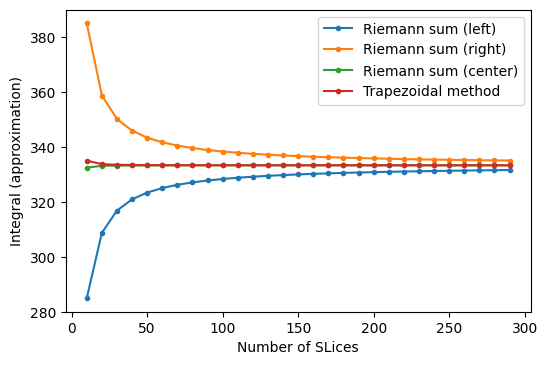

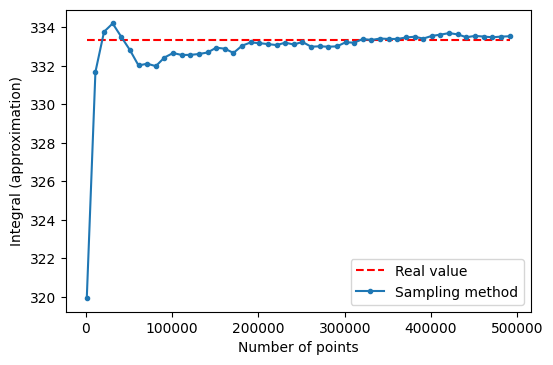

In [8]:
list_N_slices = list(range(10, 300, 10))
list_N_points = list(range(1000, 500000, 10000))

# plot integral approximations for different values of N_slices and N_points
riemann_left = []
riemann_right = []
riemann_center = []
trapezoidal = []
sampling = []

for N_slices in list_N_slices:
    # print("Real value: %0.2f"%(integral_x_square(x_min, x_max)))
    # print("Riemann left: %0.2f"%(integral_riemann_sum_left(x_square, x_min, x_max, N_slices)))
    # print("Riemann right: %0.2f"%(integral_riemann_sum_right(x_square, x_min, x_max, N_slices)))
    # print("Riemann center: %0.2f"%(integral_riemann_sum_center(x_square, x_min, x_max, N_slices)))
    # print("Trapezoidal: %0.2f"%(integral_trapezoidal(x_square, x_min, x_max, N_slices)))
    riemann_left.append(integral_riemann_sum_left(x_square, x_min, x_max, N_slices))
    riemann_right.append(integral_riemann_sum_right(x_square, x_min, x_max, N_slices))
    riemann_center.append(integral_riemann_sum_center(x_square, x_min, x_max, N_slices))
    trapezoidal.append(integral_trapezoidal(x_square, x_min, x_max, N_slices))

for N_points in list_N_points:
    args = [seed, a, C, m, N_points]
    result = integral_sampling(x_square, generate_random_numbers, args, x_min, x_max)
    # print("Sampling: %0.2f"%(result)) 
    sampling.append(result)

# plot
plt.figure(dpi = 100)
plt.xlabel("Number of SLices")
plt.ylabel("Integral (approximation)")
plt.plot(list_N_slices, riemann_left, marker = '.', label = "Riemann sum (left)")
plt.plot(list_N_slices, riemann_right, marker = '.', label = "Riemann sum (right)")
plt.plot(list_N_slices, riemann_center, marker = '.', label = "Riemann sum (center)")
plt.plot(list_N_slices, trapezoidal, marker = '.' , label = "Trapezoidal method")
plt.legend()
plt.savefig('test5')
plt.show()

plt.figure(dpi = 100)
plt.xlabel("Number of points")
plt.ylabel("Integral (approximation)")
plt.plot(list_N_points , [real_value for i in list_N_points], 'r--', label = "Real value")
plt.plot(list_N_points, sampling, marker = '.', label = "Sampling method")
plt.legend()
plt.savefig('test6')
plt.show()   

## Question 3: derive the approximate scaling in the error with the resolution for each method

In [9]:
# keep errors in memory for each method and different values of N_slices/N_points
E_riemann_left = []
E_riemann_right = []
E_riemann_center = []
E_trapezoidal = []
E_sampling = []

In [10]:
list_N_slices = list(range(10, 300, 10))
list_N_points = list(range(1000, 100000, 1000))

# calculate errors for trapezoidal and riemann sums
for N_slices in list_N_slices:
    E_riemann_left.append(abs(integral_riemann_sum_left(x_square, x_min, x_max, N_slices) - real_value))
    E_riemann_right.append(abs(integral_riemann_sum_right(x_square, x_min, x_max, N_slices) - real_value))
    E_riemann_center.append(abs(integral_riemann_sum_center(x_square, x_min, x_max, N_slices) - real_value))
    E_trapezoidal.append(abs(integral_trapezoidal(x_square, x_min, x_max, N_slices) - real_value))

# calculate errors for sampling method
for N_points in list_N_points:
    args = [seed, a, C, m, N_points]
    E_sampling.append(abs(integral_sampling(x_square, generate_random_numbers, args, x_min, x_max) - real_value)) 

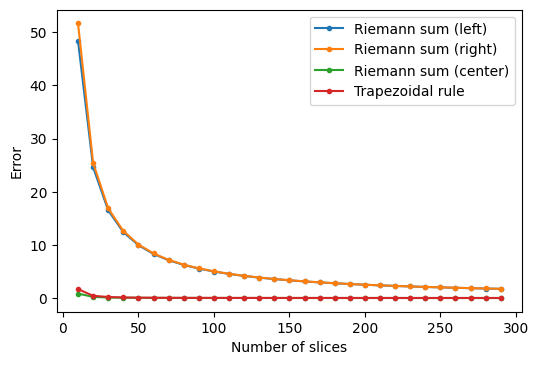

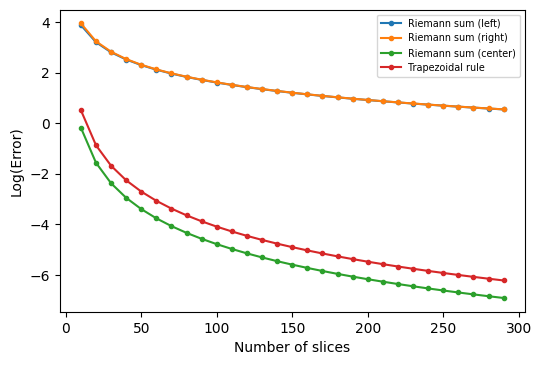

In [11]:
# plot all riemann sums and trapezoidal method together
plt.figure(dpi = 100)
plt.plot(list_N_slices, E_riemann_left, label = "Riemann sum (left)", marker = '.')
plt.plot(list_N_slices, E_riemann_right, label = "Riemann sum (right)", marker = '.')
plt.plot(list_N_slices, E_riemann_center, label = "Riemann sum (center)", marker = '.')
plt.plot(list_N_slices, E_trapezoidal, label = "Trapezoidal rule", marker = '.')
plt.legend()
plt.xlabel("Number of slices")
plt.ylabel("Error")
plt.savefig('test7')
plt.show()

# same with log
plt.figure(dpi = 100)
plt.plot(list_N_slices, np.log(E_riemann_left), label = "Riemann sum (left)", marker = '.')
plt.plot(list_N_slices, np.log(E_riemann_right), label = "Riemann sum (right)", marker = '.')
plt.plot(list_N_slices, np.log(E_riemann_center), label = "Riemann sum (center)", marker = '.')
plt.plot(list_N_slices, np.log(E_trapezoidal), label = "Trapezoidal rule", marker = '.')
plt.legend(loc = 'upper right', fontsize = 'x-small')
plt.xlabel("Number of slices")
plt.ylabel("Log(Error)")
plt.savefig('test8')
plt.show()

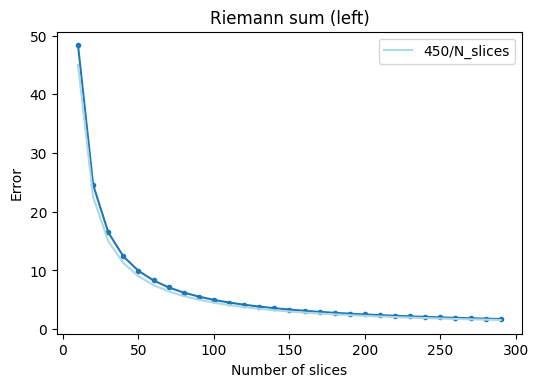

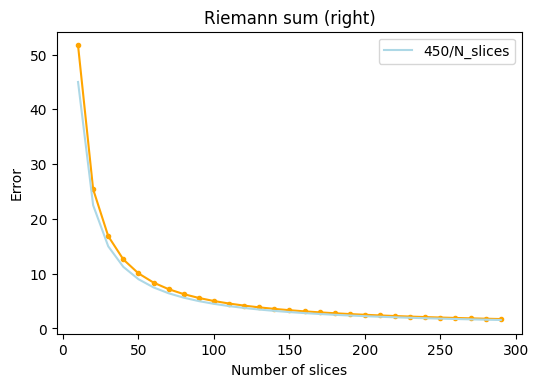

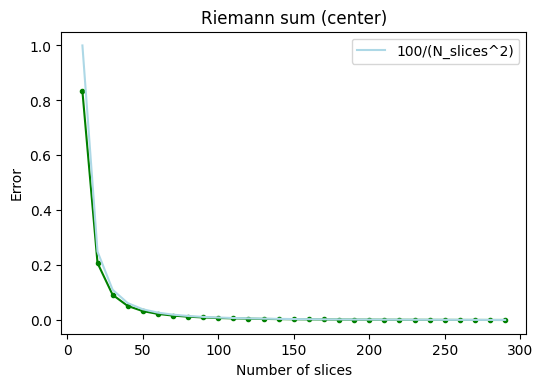

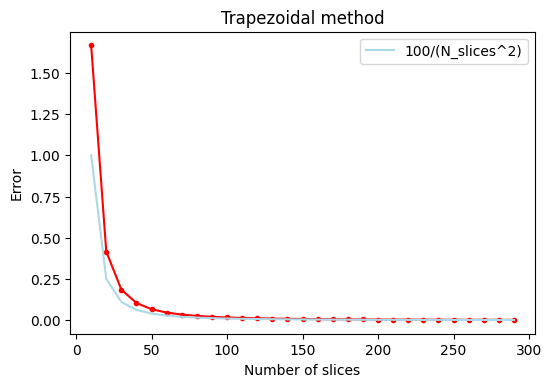

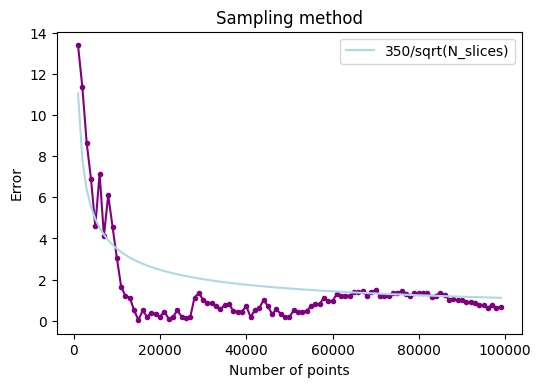

In [12]:
# plot individually
plt.figure(dpi = 100)
plt.plot(list_N_slices, E_riemann_left, marker = '.')
plt.plot(list_N_slices, [450/i for i in list_N_slices], c = 'lightblue', label = "450/N_slices")
plt.title("Riemann sum (left)")
plt.xlabel("Number of slices")
plt.ylabel("Error")
plt.legend()
plt.savefig('test9')
plt.show()

plt.figure(dpi = 100)
plt.plot(list_N_slices, E_riemann_right, marker = '.', c = 'orange')
plt.plot(list_N_slices, [450/i for i in list_N_slices], c = 'lightblue', label = "450/N_slices")
plt.title("Riemann sum (right)")
plt.xlabel("Number of slices")
plt.ylabel("Error")
plt.legend()
plt.savefig('test10')
plt.show()

plt.figure(dpi = 100)
plt.plot(list_N_slices, E_riemann_center, marker = '.', c = 'green')
plt.plot(list_N_slices, [100/i**2 for i in list_N_slices], c = 'lightblue', label = "100/(N_slices^2)")
plt.title("Riemann sum (center)")
plt.xlabel("Number of slices")
plt.ylabel("Error")
plt.legend()
plt.savefig('test11')
plt.show()

plt.figure(dpi = 100)
plt.plot(list_N_slices, E_trapezoidal, marker = '.', c = 'red')
plt.plot(list_N_slices, [100/i**2 for i in list_N_slices], c = 'lightblue', label = "100/(N_slices^2)")
plt.title("Trapezoidal method")
plt.xlabel("Number of slices")
plt.ylabel("Error")
plt.legend()
plt.savefig('test12')
plt.show()

plt.figure(dpi = 100)
plt.plot(list_N_points, E_sampling, marker = '.', c = 'purple')
plt.plot(list_N_points, [350/math.sqrt(i) for i in list_N_points], c = 'lightblue', label = "350/sqrt(N_slices)")
plt.title("Sampling method")
plt.xlabel("Number of points")
plt.ylabel("Error")
plt.legend()
plt.savefig('test13')
plt.show()